# <span style='color:OrangeRed'>V9 - Zustandsrekonstruktion mittels Beobachter</span>

In [2]:
from systheo2functions import *
%matplotlib inline

## <span style='color:Gray'>Beispiel #1 </span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Für das System:

In [3]:
A = np.array([[-2,1],
              [0,-1]])
  
B = np.array([[1],
              [1]])

C = np.array([[1,0]])

D = np.array([0])

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
soll ein Beobachter entworfen werden mit den Polen: $s_{1,2}$ = [-10+1j*5 -10-1j*5]

In [4]:
poles = [-10+1j*5,-10-1j*5]
# po = [-5+1j*5 -5-1j*5]  % Beobachterpole

In [5]:
row1 = C
row2 = np.matmul(C,A)
So = np.r_[row1,row2]
#So = (C  )
#     (C*A)
print("So:\n"+str(So))

print_rank(So)

So:
[[ 1  0]
 [-2  1]]
Rang: 2


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Zunächst prüfen wir die Beobachtbarkeit und die Beobachterverstärkung wird berechnet zu:

In [6]:
G = signal.place_poles(A.T, C.T, poles).gain_matrix
print("G:"+str(G))

G:[[ 17. 106.]]


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
    Durch die Matrix <code>G</code> ändert sich das dynamische Verhalten des geschlossenen Systems
mit Beobachter.
<br> bestimmen wir die Eigenwerte für das System mit Beobachter:

In [7]:
Ao = A-np.matmul(G.T,C)
print("Ao:\n"+str(Ao))
print_eig(Ao)

Ao:
[[ -19.    1.]
 [-106.   -1.]]
Eigenwerte:
(-10+5j)
(-10-5j)


In [8]:
column1 = B
column2 = G.T
Bo = np.c_[column1,column2]
print("Bo:\n"+str(Bo))

Bo:
[[  1.  17.]
 [  1. 106.]]


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
 Veranschaulichung:

<img src="bilder/v09_beispiel1.png"/>

In [9]:
tini = 0 # Start time
tfinal = 10 # End time
dt = 0.001 # Time Step
nflows_1 = 13 # Number of data flows in the schematic

xo_1 = np.array([[2],
                 [1]])
xo_2 = np.array([[0],
                 [0]])

#Matrices:
C2 = np.array([[1,0],
               [0,1]]);
D2 = np.array([[0],
               [0]]);
Do = np.array([[0,0],
               [0,0]]);

sc1 = Schema(tini,tfinal,dt,nflows_1) # Instance of the simulation schematic

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
<br><span style='color:Orange'>SquareSignal Function Definition:</span>
<br><code>SquareSignal(1.argument = output, 2.argument = high, 3.argument = low, 4.argument = frequency , 5.argument = duty cycle )</code>
<br>Der Tastgrad (eng. Duty Cycle) wird als Verhältniszahl mit einem Wertebereich von 0 bis 1 oder 0 bis 100 % angegeben. Hier 50 (default).

In [11]:
c1 = SquareSignal(1,10,0,1,0.5) #input

c2 = StateSpace([1],[2,3],A,B,C2,D2,xo_1) #original system
c3 = StateSpace([1],[4,5],A,B,C2,D2,xo_2) #erroneous system
c4 = StateSpace([1,8],[6,7],Ao,Bo,C2,Do,xo_2) #observer system
c5 = Gain([2,3],[8],C)
c6 = Sum(2,4,9,1,-1)
c7 = Sum(3,5,10,1,-1)
c8 = Sum(2,6,11,1,-1)
c9 = Sum(3,7,12,1,-1)

sc1.AddListComponents(np.array([c1,c2,c3,c4,c5,c6,c7,c8,c9]))

#Run the schematic and plot:
out1 = sc1.Run(np.array([1,2,3,4,5,6,7,8,9,10,11,12]))

time1 = out1[0,:]

In [12]:
%matplotlib inline
plt.plot(time1,out1[2,:], time1,out1[3,:])
plt.legend(['Signal 2: State-Space x_{dot}','Signal 3: State-Space y'])
plt.grid()
plt.show()

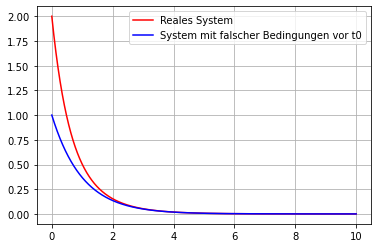

In [13]:
%matplotlib inline
plt.plot(time1,out1[9,:],'r', time1,out1[10,:],'b')
plt.legend(['Reales System','System mit falscher Bedingungen vor t0'])
plt.grid()
plt.show()

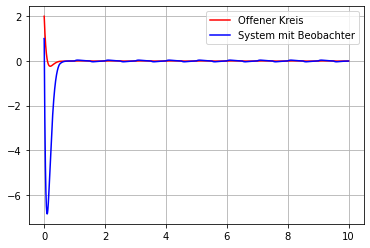

In [14]:
%matplotlib inline
plt.plot(time1,out1[11,:],'r', time1,out1[12,:],'b')
plt.legend(['Offener Kreis','System mit Beobachter'])
plt.grid()
plt.show()

## <span style='color:Gray'>Beispiel #2 </span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Für das System der Zustandsraumdarstellung:
<br>$\dot{x}(t)$= $Ax(t)$ + $bu(t)$
<br>$y(t)$=$c^Tx(t)$
<br>Mit Matrizen:
 <br>    $A$ = $\left[ \begin{array}{rrrr}
           1 & 1  \\
          -2 & -1  \\
          \end{array}\right] $
<br><br>    $B$ =  $\left[ \begin{array}{rrrr}
           0   \\
           1   \\
          \end{array}\right] $
<br><br>    $C$ =  $\left[ \begin{array}{rrrr}
           1 & 0  \\
           \end{array}\right] $
<br><br>    $D$ = $0$ 
<br>vergleichen wir das dynamische Verhalten
vom geschlossenen Regelkreis ohne und mit
Beobachter.

In [15]:
A = np.array([[-2,1],
              [0,-1]])
  
B = np.array([[0],
              [1]])

C = np.array([[1,0]])

D = np.array([0])

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Zunächst prüfen wir die Steuerbarkeit:

In [16]:
column1 = B
column2 = np.matmul(A,B)
Sc = np.c_[column1,column2] #Sc = (B A*B)
print("Sc:\n"+str(Sc))

print_rank(Sc)

Sc:
[[ 0  1]
 [ 1 -1]]
Rang: 2


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Dann wird die Beobachtbarkeit geprüft:

In [17]:
row1 = C
row2 = np.matmul(C,A)
So = np.r_[row1,row2]
print("So:\n"+str(So))

print_rank(So)

So:
[[ 1  0]
 [-2  1]]
Rang: 2


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Gebe nun für den geschlossenen Regelkreis diese zwei Pole vor:

In [18]:
pc = [-5+1j*5,-5-1j*5]
K = signal.place_poles(A, B, pc).gain_matrix
print("K:"+str(K))

K:[[34.  7.]]


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Der Beobachterpol beträgt:

In [19]:
csi = 0.8

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Wähle die Grundfrequenz zu $\omega_0$ = 10:

In [20]:
omega0 =10

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Definition von Beobachterpolen in Bezug auf die Grundfrequenz $\omega_0$ um das dynamische
Verhalten zu ändern:

In [21]:
poles = [-csi*omega0+1j*omega0*sqrt(1-csi*csi),-csi*omega0-1j*omega0*sqrt(1-csi*csi)]
G = signal.place_poles(A.T, C.T, poles).gain_matrix
print("G:"+str(G))

G:[[13. 85.]]


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Berechne die Beobachter Eigenwerte:

In [22]:
print(A)
print(G.T)
print(C)
Ao = A-np.matmul(G.T,C)
print("Ao:\n"+str(Ao))
print_eig(Ao)

[[-2  1]
 [ 0 -1]]
[[13.]
 [85.]]
[[1 0]]
Ao:
[[-15.   1.]
 [-85.  -1.]]
Eigenwerte:
(-8+6j)
(-8-6j)


In [23]:
column1 = B
column2 = G.T
Bo = np.c_[column1,column2]
print("Bo:\n"+str(Bo))

Bo:
[[ 0. 13.]
 [ 1. 85.]]


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Wir arbeiten nun mit folgendem Simulink Modell:

<img src="bilder/v09_beispiel2.png"/>

In [24]:
tini = 0 # Start time
tfinal = 5 # End time
dt = 0.01 # Time Step
nflows_2 = 12 # Number of data flows in the schematic

xo_1 = np.array([[2],
                 [1]])
xo_2 = np.array([[0],
                 [0]])

#Matrices:
C2 = np.array([[1,0],
               [0,1]]);
D2 = np.array([[0],
               [0]]);
Do = np.array([[0,0],
               [0,0]]);

sc2 = Schema(tini,tfinal,dt,nflows_2) # Instance of the simulation schematic

c2_1 = StateSpace([3],[1,2],A,B,C2,D2,xo_1)
c2_2 = Gain([1,2],[3],-1*K)

c2_3 = StateSpace([6],[4,5],A,B,C2,D2,xo_1)
c2_4 = Gain([7,8],[6],-1*K)

c2_5 = StateSpace([6,9],[7,8],Ao,Bo,C2,Do,xo_2)
c2_6 = Gain([4,5],[9],C)

#print(Ao)
#print(Bo)
#print(C2)
#print(Do)
#print("xo_2:")
#print(xo_2)

c2_7 = Sum(1,4,10,1,-1)
c2_8 = Sum(2,5,11,1,-1)

sc2.AddListComponents(np.array([c2_1,c2_2,c2_3,c2_4,c2_5,c2_6,c2_7,c2_8]))

#Run the schematic and plot:
out2 = sc2.Run(np.array([1,2,3,4,5,6,7,8,9,10,11]))

time2 = out2[0,:]
#print(out2[7,:])

In [25]:
%matplotlib inline
plt.plot(time2,out2[1,:],'r', time2,out2[2,:],'b')
plt.legend(['1','2'])
plt.grid()
plt.show()

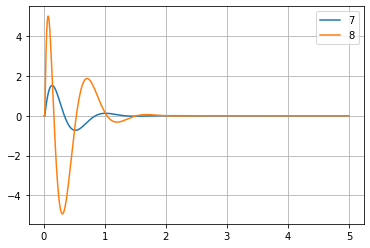

In [26]:
%matplotlib inline
plt.plot(time2,out2[7,:],time2,out2[8,:])
plt.legend(['7','8'])
plt.grid()
plt.show()

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
    Im Folgenden lässt sich  $\omega_0$ mittels Schieberegler einstellen.<br>
<b> Aufgabe:</b> Wiederholen Sie nun die Simulation mit $\omega_0$ = 1, d.h. langsamer!<br>
    Probieren Sie auch gerne andere Werte für  $\omega_0$ aus.

In [27]:
#Gleiche Simulation mit anderem omega:
%matplotlib widget
fig, ax = plt.subplots(figsize=(9, 5))
ax.set_ylim([-10, 15])
ax.grid(True)

dic = {"Regler ohne Beobachter 1&2":[1,2],"Abweichung 10&11":[10,11],"Beobachter 4&5":[4,5],
       "Regler mit Beobachter 7&8":[7,8]}
@widgets.interact(omega=(1, 20, 1), scope = ["Regler ohne Beobachter 1&2","Abweichung 10&11",
                                             "Beobachter 4&5","Regler mit Beobachter 7&8"])

def update(omega = 1, scope="Regler mit Beobachter 7&8"):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]
    [l.remove() for l in ax.lines]
    omega0 =omega
    poles = [-csi*omega0+1j*omega0*sqrt(1-csi*csi),-csi*omega0-1j*omega0*sqrt(1-csi*csi)]
    G = signal.place_poles(A.T, C.T, poles).gain_matrix
    #print("G:"+str(G))
    Ao = A-np.matmul(G.T,C)
    #print("Ao:\n"+str(Ao))
    #print_eig(Ao)
    column1 = B
    column2 = G.T
    Bo = np.c_[column1,column2]
    #print("Bo:\n"+str(Bo))

    tini = 0 # Start time
    tfinal = 5 # End time
    dt = 0.001 # Time Step
    nflows_2 = 12 # Number of data flows in the schematic

    xo_1 = np.array([[2],[1]])
    xo_2 = np.array([[0],[0]])

    #Matrices:
    C2 = np.array([[1,0],
               [0,1]]);
    D2 = np.array([[0],[0]]);
    Do = np.array([[0,0],
               [0,0]]);

    sc2 = Schema(tini,tfinal,dt,nflows_2) # Instance of the simulation schematic

    c2_1 = StateSpace([3],[1,2],A,B,C2,D2,xo_1);
    c2_2 = Gain([1,2],[3],-K);

    c2_3 = StateSpace([6],[4,5],A,B,C2,D2,xo_1);
    c2_4 = Gain([7,8],[6],-K);

    c2_5 = StateSpace([6,9],[7,8],Ao,Bo,C2,Do,xo_2);
    c2_6 = Gain([4,5],[9],C);

    c2_7 = Sum(1,4,10,1,-1);
    c2_8 = Sum(2,5,11,1,-1);

    sc2.AddListComponents(np.array([c2_1,c2_2,c2_3,c2_4,c2_5,c2_6,c2_7,c2_8]))

    #Run the schematic and plot:
    out2 = sc2.Run(np.array([1,2,3,4,5,6,7,8,9,10,11]))

    time2 = out2[0,:]
    
    ax.plot(time2,out2[dic[scope][0],:],'r', time2,out2[dic[scope][1],:],'b')
    plt.show()
    


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=1, description='omega', max=20, min=1), Dropdown(description='scope', in…

## <span style='color:Gray'>Beispiel #3 </span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Nun arbeiten wir mit einem diskreten System. Für das System mit der Zustandsraumdarstellung:

In [28]:
A = np.array([[-2,1],
              [0,-1]])
  
B = np.array([[0],
              [1]])

C = np.array([[1,0]])

D = np.array([0])

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
und der Abtastzeit $T_s=0.1$ wollen wir das dynamische Verhalten vom geschlossenen Regelkreis ohne und mit Beobachter vergleichen.

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Zunächst prüfen wir die Steuerbarkeit:

In [29]:
column1 = B
column2 = np.matmul(A,B)
Sc = np.c_[column1,column2] #Sc = (B A*B)
print("Sc:\n"+str(Sc))

print_rank(Sc)

Sc:
[[ 0  1]
 [ 1 -1]]
Rang: 2


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Das System ist zeitdiskret. Infolgedessen führe folgenden Berechnungen durch:

In [30]:
Ts = 0.01

pc = np.array([-5+1j*5,-5-1j*5])
pcd = exp(Ts*pc)
Ad = linalg.expm(Ts*A)
print("Ad:\n"+str(Ad))
Bd = matmul_loop([Ad-[[1,0],[0,1]],inv(A),B]) #(Ad-Einheitsmatrix)*inv(A)*B
print("Bd:\n"+str(Bd))

Ad:
[[0.98019867 0.00985116]
 [0.         0.99004983]]
Bd:
[[4.95029042e-05]
 [9.95016625e-03]]


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Reglerentwurf:

In [31]:
K = signal.place_poles(Ad, Bd, pcd).gain_matrix
print("K:"+str(K))

K:[[32.4989039   6.89018096]]


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Die Beobachtbarkeit wird geprüft:

In [32]:
row1 = C
row2 = np.matmul(C,Ad)
So = np.r_[row1,row2]
print("So:\n"+str(So))

print_rank(So)

So:
[[1.         0.        ]
 [0.98019867 0.00985116]]
Rang: 2


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Beobachter Eigenwerte:

In [33]:
poles = [0,0]

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Es handelt sich um einen <span style='color:OrangeRed'>Deadbeat Beobachter</span>!

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Beobachterpole:
<br><span style='color:Gray'>Hinweis</span>: Verwende Funktion <code>control.acker</code> anstelle von <code>signal.place_poles</code>!

In [34]:
#Gd = acker(Ad',C',poles)
Gd = control.acker(Ad.T, C.T, poles)
print("Gd:"+str(Gd))
       
Aod = Ad-np.matmul(Gd.T,C)
print("Aod:\n"+str(Aod))
print_eig(Aod)
       
column1 = Bd
column2 = Gd.T
Bod = np.c_[column1,column2]
print("Bod:\n"+str(Bod))

Gd:[[ 1.97024851 99.50083333]]
Aod:
[[-9.90049834e-01  9.85116044e-03]
 [-9.95008333e+01  9.90049834e-01]]
Eigenwerte:
0j
-0j
Bod:
[[4.95029042e-05 1.97024851e+00]
 [9.95016625e-03 9.95008333e+01]]


<img src="bilder/v09_beispiel3.png"/>

In [48]:
tini = 0 # Start time
tfinal = 3 # End time
dt = 0.001 # Time Step
nflows_3 = 14 # Number of data flows in the schematic

xo_1 = np.array([[2],[1]])
xo_2 = np.array([[0],[0]])

#Matrices:
C2 = np.array([[1,0],
               [0,1]]);
D2 = np.array([[0],
               [0]]);
Do = np.array([[0,0],
               [0,0]]);

sc3 = Schema(tini,tfinal,dt,nflows_3) # Instance of the simulation schematic

c3_1 = ZOH(4,1,Ts); #ZOH arguments: in_ID,out_ID,T
c3_2 = StateSpace([1],[2,3],A,B,C2,D2,xo_1); 
c3_3 = Gain([2,3],[4],-K);

c3_4 = ZOH(11,5,Ts);
c3_5 = StateSpace([5],[6,7],A,B,C2,D2,xo_1);

c3_6 = Sum(2,6,12,1,-1);
c3_7 = Sum(3,7,13,1,-1);

c3_8 = Gain([6,7],[8],C);

# Notice, that we introduce the discrete StateSpace Object here: DTStateSpace(in,out,A,B,C,D,xo,Ty)
c3_9 = DTStateSpace([11,8],[9,10],Aod,Bod,C2,Do,xo_2,Ts);

c3_10 = Gain([9,10],[11],-K);

sc3.AddListComponents(np.array([c3_1,c3_2,c3_3,c3_4,c3_5,c3_6,c3_7,c3_8,c3_9,c3_10]))

#Run the schematic and plot:
out3 = sc3.Run(np.array([1,2,3,4,5,6,7,8,9,10,11,12,13]))

time3 = out3[0,:]

**Plot zeitdiskreten Regelkreis ohne Beobachter:**

In [49]:
%matplotlib inline
plt.plot(time3,out3[2,:],'r', time3,out3[3,:],'b')
plt.legend(['State-Space:1','State-Space:2'])
plt.grid()
plt.show()

**Plot Regelkreis mit Zustandsbeobachter:**

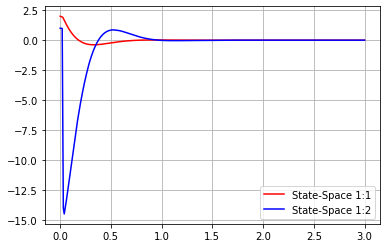

In [50]:
%matplotlib inline
plt.plot(time3,out3[6,:],'r', time3,out3[7,:],'b')
plt.legend(['State-Space 1:1','State-Space 1:2'])
plt.grid()
plt.show()

**Plot Differenz beider Regelkreise:**

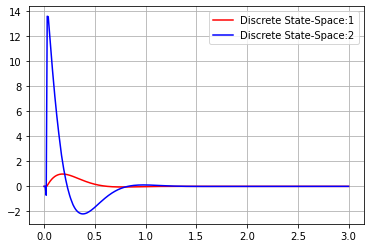

In [51]:
%matplotlib inline
plt.plot(time3,out3[12,:],'r', time3,out3[13,:],'b')
plt.legend(['Discrete State-Space:1','Discrete State-Space:2'])
plt.grid()
plt.show()

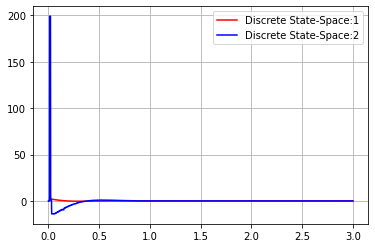

In [52]:
%matplotlib inline
plt.plot(time3,out3[9,:],'r', time3,out3[10,:],'b')
plt.legend(['Discrete State-Space:1','Discrete State-Space:2'])
plt.grid()
plt.show()